# SVM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Lets load the dataset

In [3]:

mushrooms = pd.read_csv("D:/Assignments/SVM/SVM/mushroom.csv")
mushrooms.head()


Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [4]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

# Histograms for each feature

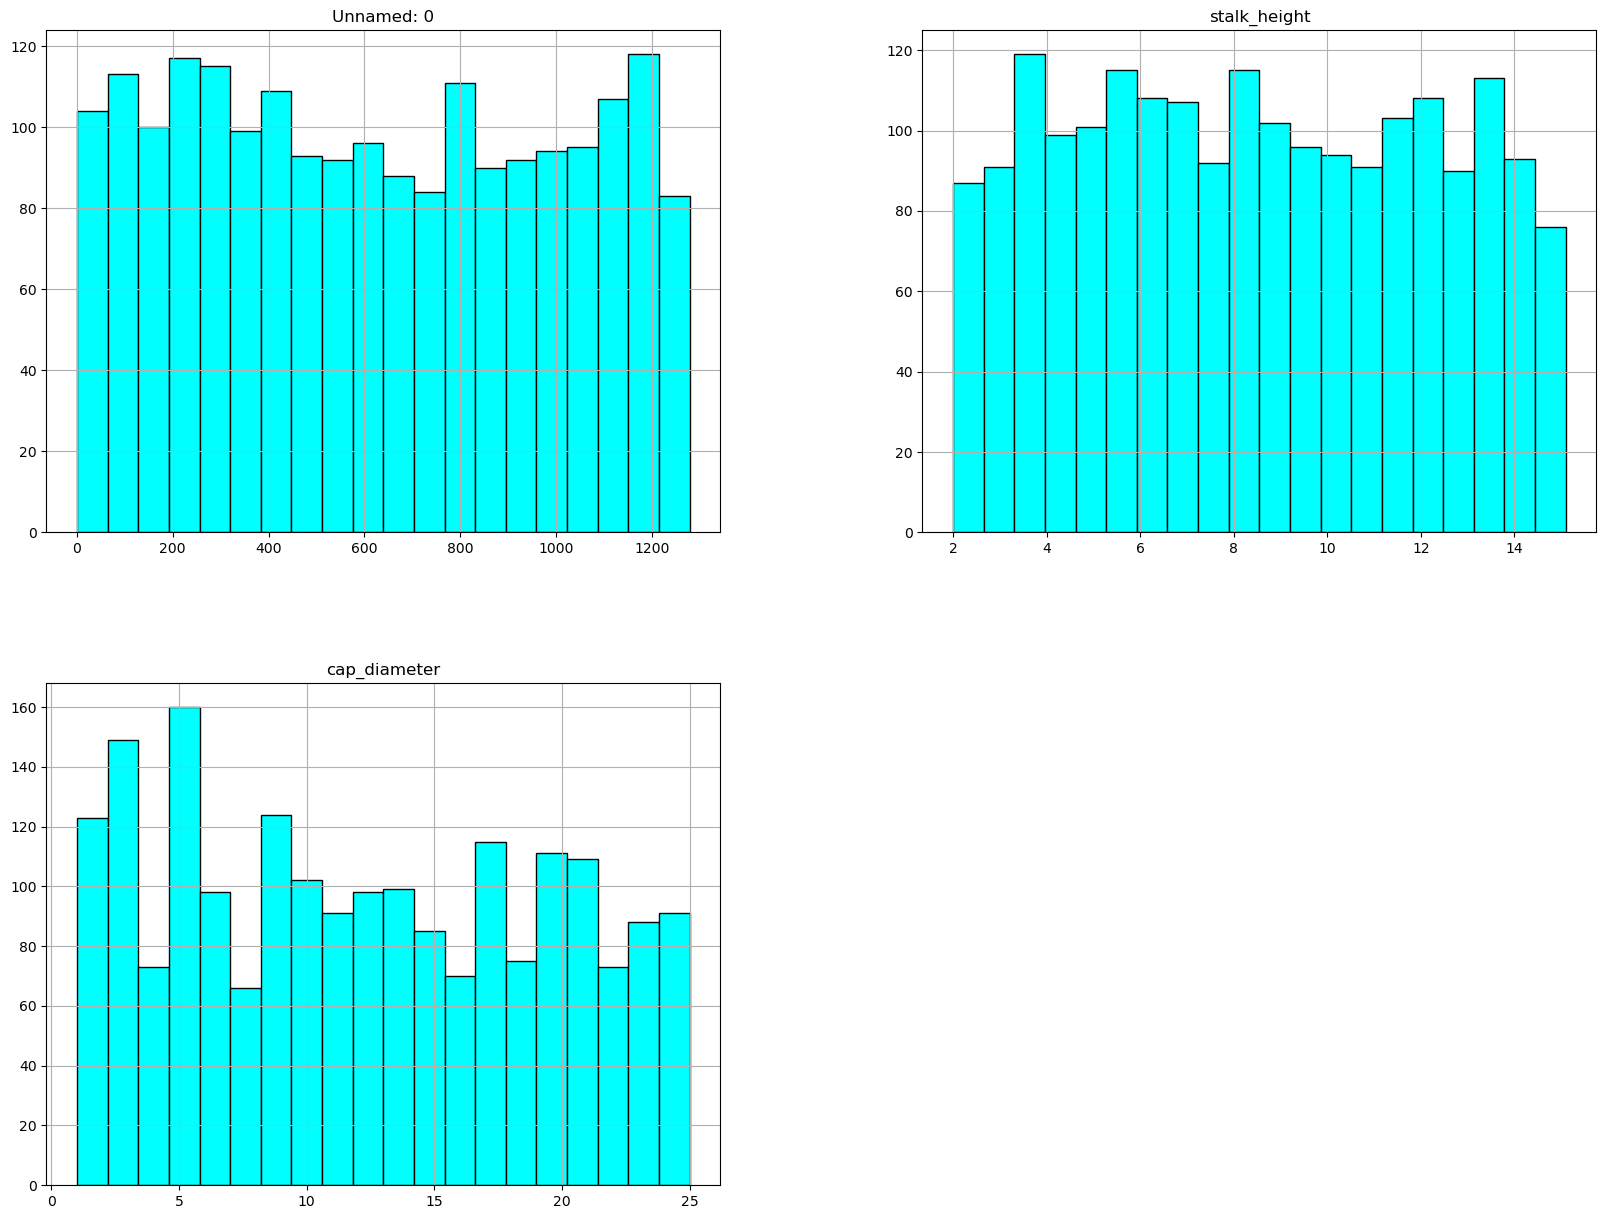

In [6]:
mushrooms.hist(bins=20, figsize=(20, 15),color='cyan',edgecolor='k')
plt.show()

# Box plots

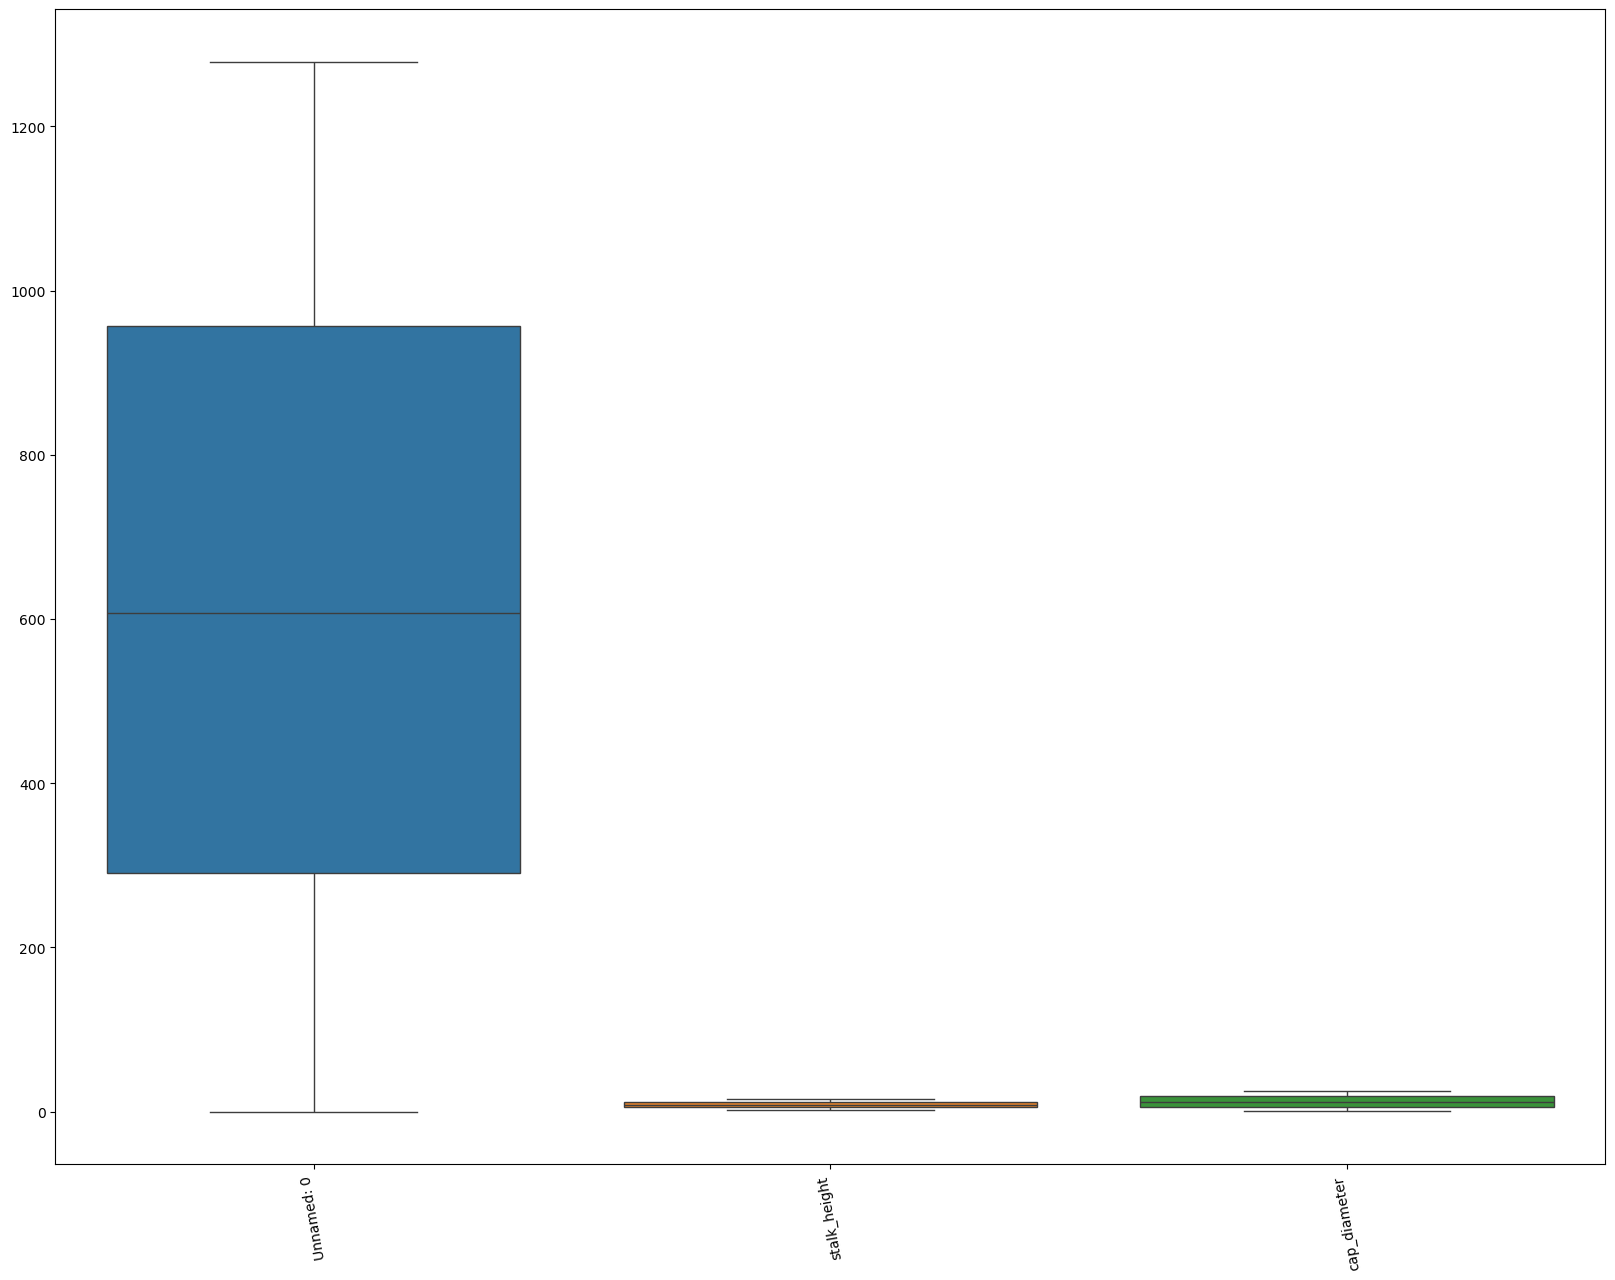

In [8]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=mushrooms)
plt.xticks(rotation=100)
plt.show()

# Density plots

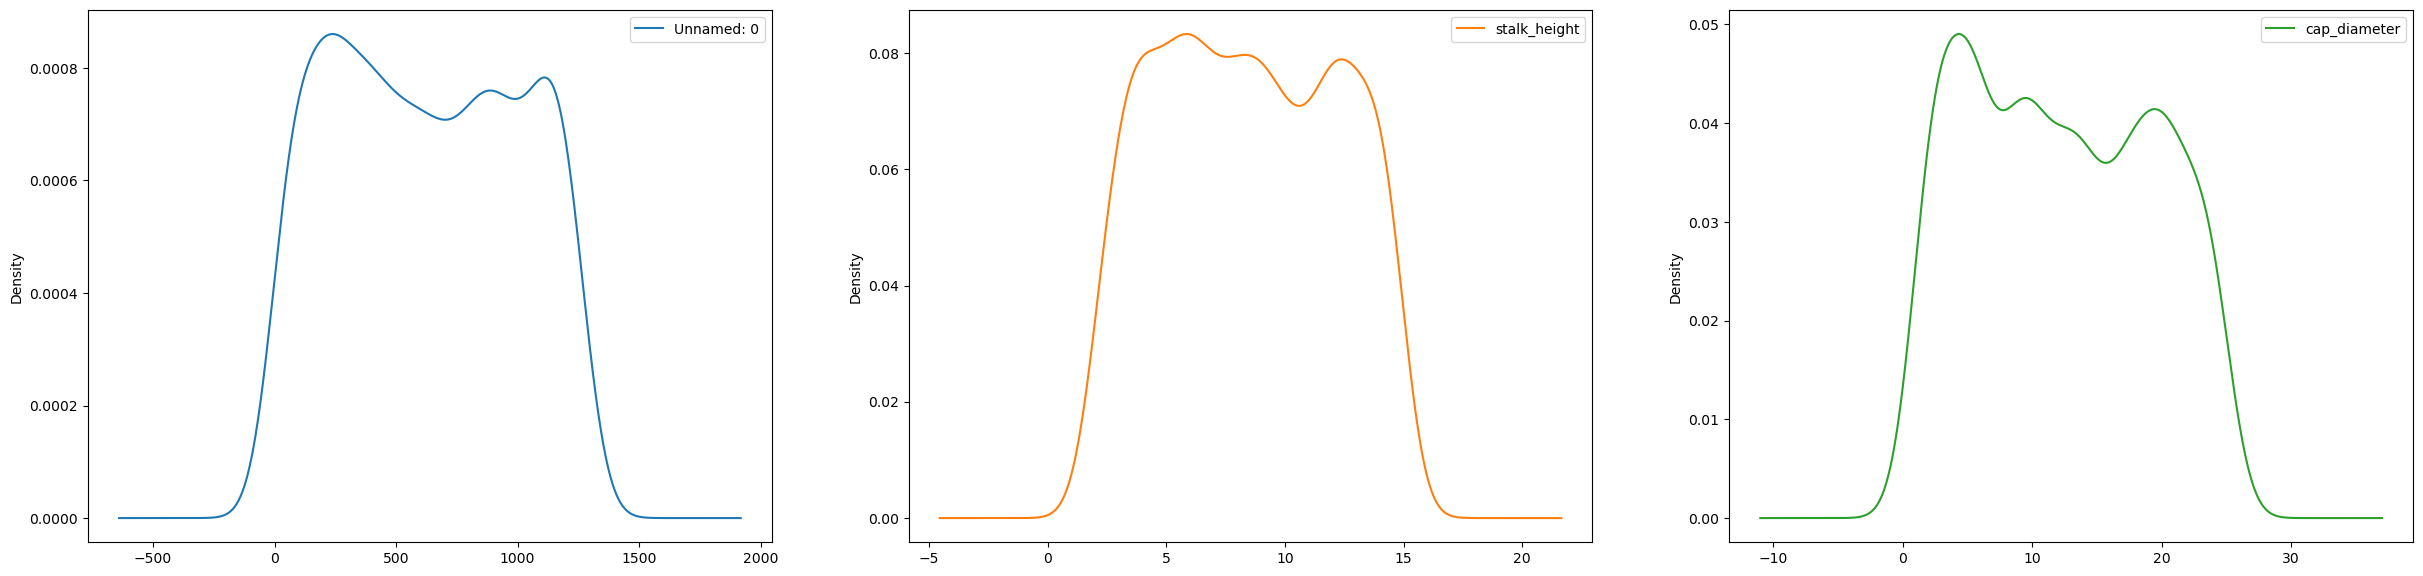

In [10]:
mushrooms.plot(kind='density', subplots=True, layout=(8, 3), sharex=False, figsize=(30, 65))
plt.show()

# 3. Feature Correlation

# Encoding categorical variables for correlation analysis

In [13]:
mushrooms_encoded = pd.get_dummies(mushrooms.drop('class', axis=1))

## Correlation matrix

In [15]:
corr_matrix = mushrooms_encoded.corr()

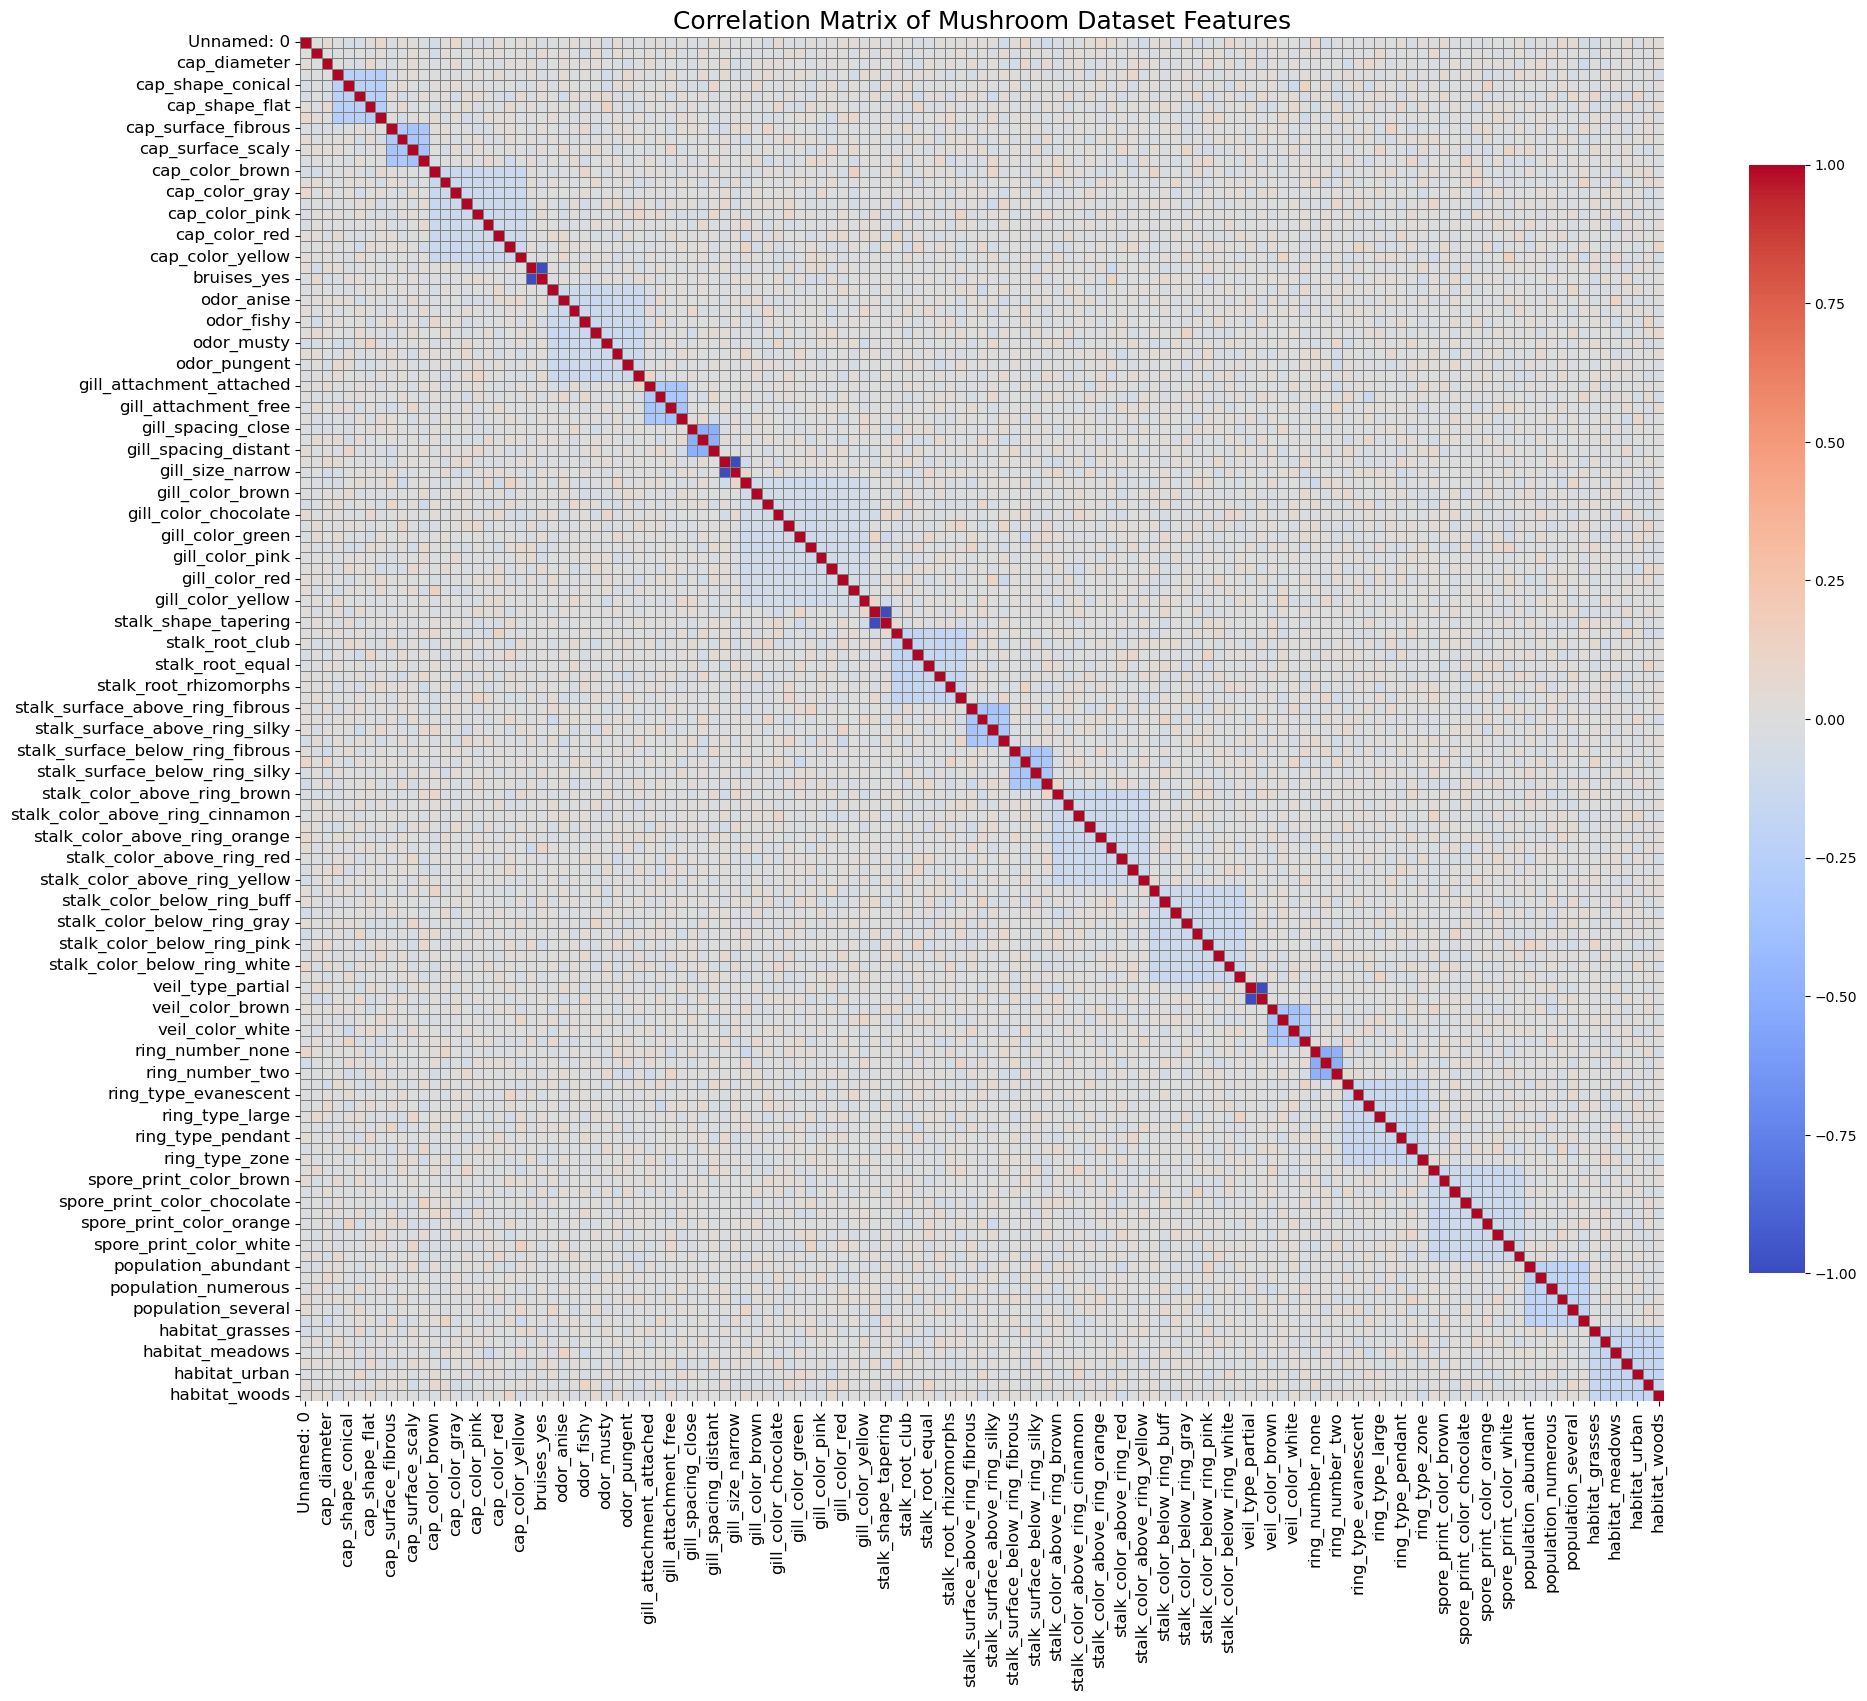

In [16]:
plt.figure(figsize=(22, 18))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, linecolor='gray', cbar_kws={"shrink": .8}, square=True)
plt.title('Correlation Matrix of Mushroom Dataset Features', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()


# Insights On The Correlation Matrix of Mushroom Dataset Features

# 1. Strength of Relationships:
+ Correlation Coefficients: Values range from -1 to 1.

+ Close to 1: Strong positive correlation (when one feature increases, so does the other).

+ Close to -1: Strong negative correlation (when one feature increases, the other decreases).

+ Close to 0: No or weak correlation.

# 2. Identifying Patterns:
+ Clusters of High Correlations: If you notice a group of features with high correlations (either positive or negative), it might suggest that these features are related or redundant.

+ Independence: Features with correlations near zero are relatively independent from each other.

# 3. Feature Selection:
+ Multicollinearity: High correlations between independent features can indicate multicollinearity, which might need to be addressed through feature reduction techniques like PCA.

# 4. Dataset Insights:
+ Redundant Features: Features with very high correlations (near 1) might be redundant and can potentially be removed.

+ Predictive Power: Features that show significant correlations with the target variable (e.g., class) could have higher predictive power.

# Task 2: Data Preprocessing
+ ### 1. Encode Categorical Variables

In [20]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for column in mushrooms.columns:
    mushrooms[column] = labelencoder.fit_transform(mushrooms[column])
mushrooms.head()

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0         889          4            2          7        0     1   
1         786          4            0          6        0     1   
2         246          3            1          5        1     4   
3         221          0            2          4        1     3   
4         630          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3           1        5   
1           0            2          6                  1           2        5   
2           3            2          6                  6           0        5   
3           3            2          0                  4           1        0   
4           2            0          4                  8           1        4   

   class  stalk_height  cap_diameter  
0      1           916           190  
1      0           128           750  
2      1           537           281  
3      1           234           829  
4      1           895           484  

[5 rows x 26 columns]

## 2. Split the Dataset

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = mushrooms.drop('class', axis=1)
y = mushrooms['class']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Data Visualization

+ ### 1. Scatter and Pair Plots

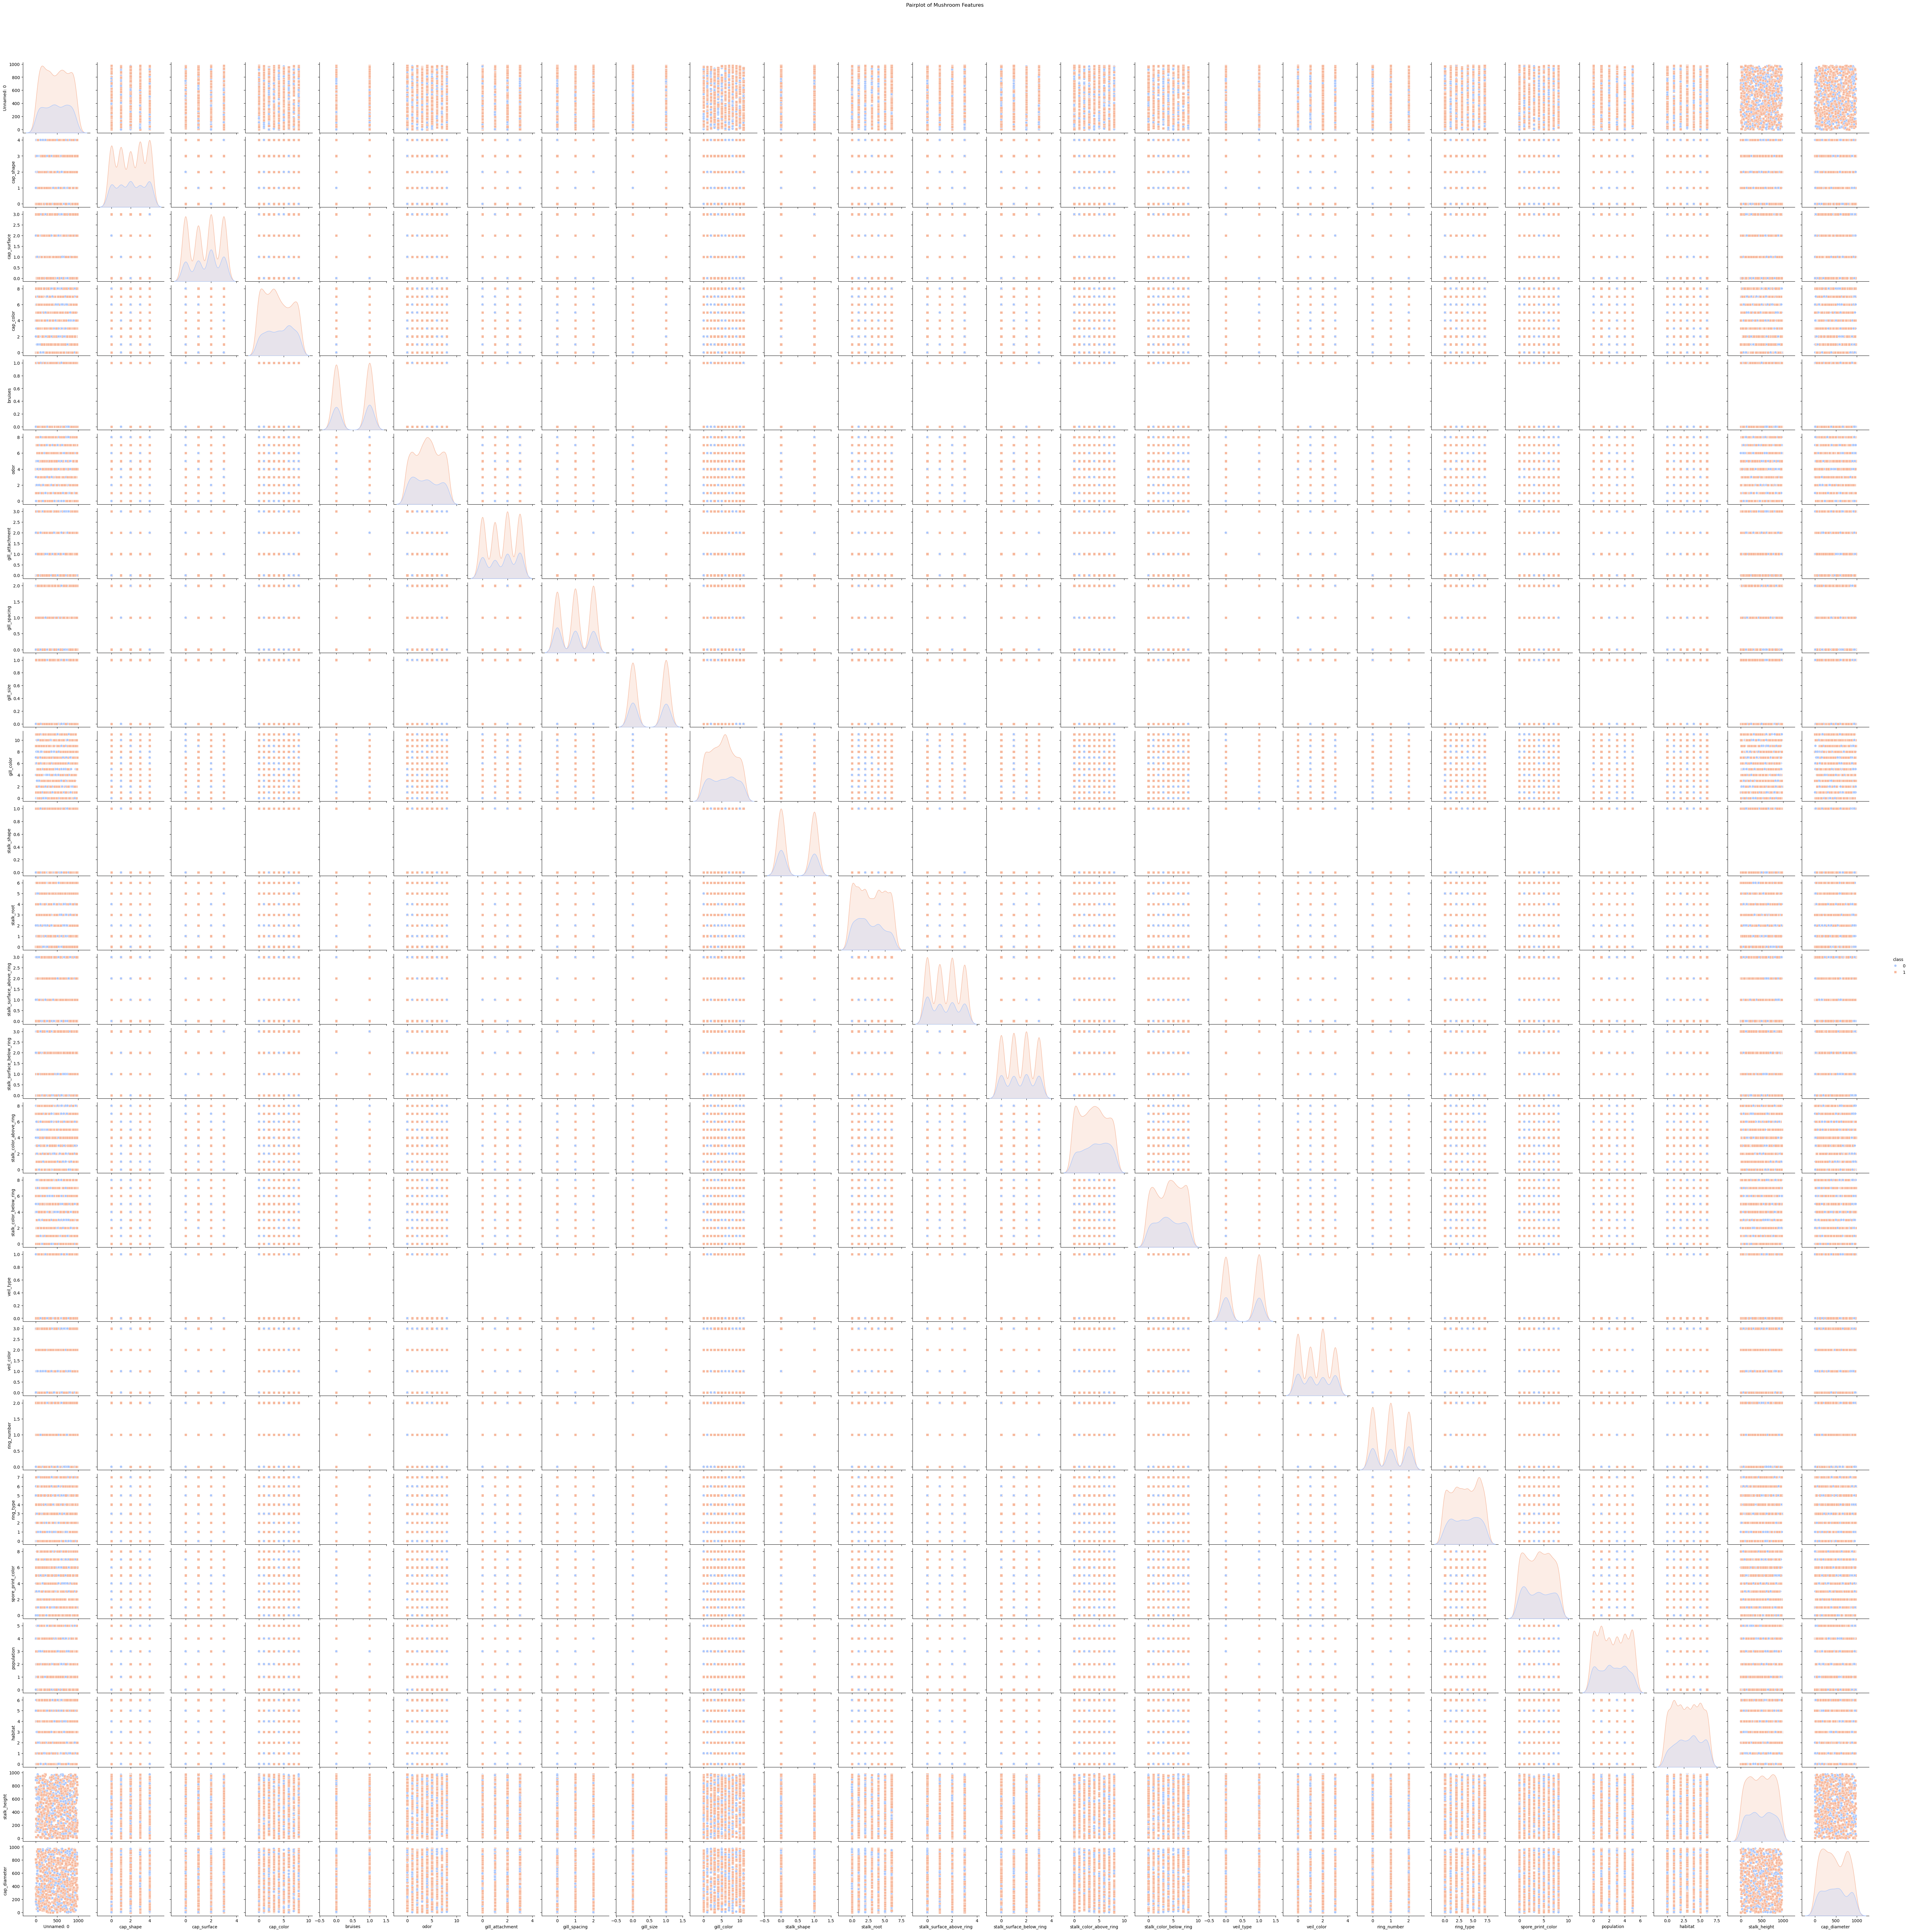

In [25]:
sns.pairplot(mushrooms, hue='class', palette='coolwarm', markers=["o", "s"])
plt.suptitle('Pairplot of Mushroom Features', y=1.02)
plt.show()

+ ## 2. Class Distribution

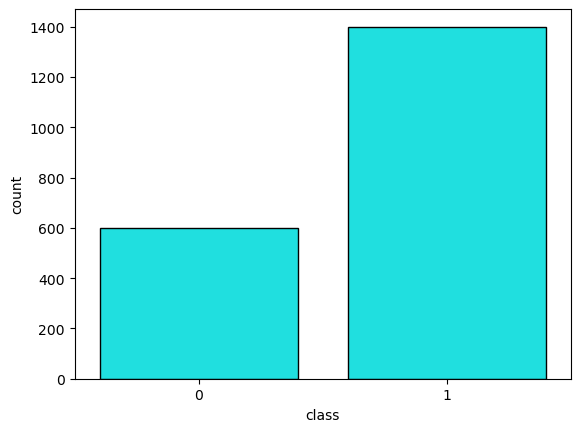

In [27]:
sns.countplot(x='class', data=mushrooms,color='cyan',edgecolor='k')
plt.show()


# Task 4: SVM Implementation
+ 1. Train SVM

In [29]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

## 2. Evaluate Model

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1 Score: 0.800599700149925


# Analysis:
+ Accuracy (66.75%): Indicates that roughly two-thirds of the total predictions were correct. This isn’t terrible, but there’s room for improvement.

+ Precision (66.75%): Suggests that about 66.75% of the predicted positive cases are true positives. This indicates some misclassification in predicting positive cases.

+ Recall (100%): Perfect recall means the model successfully identified all actual positive cases. However, this might indicate it's predicting positive too often, hence a lower precision.

+ F1 Score (80.06%): A balance between precision and recall. Given the perfect recall, the lower F1 score reflects the need to improve precision.

# Task 5: Visualization of SVM Results

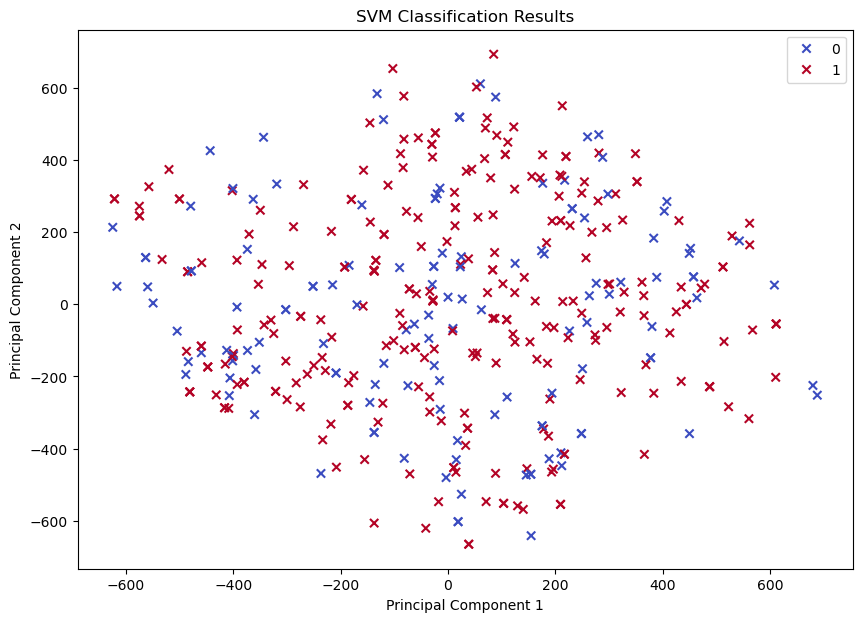

In [34]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

svm_pca = SVC(kernel='linear')
svm_pca.fit(X_train, y_train)
y_pred_pca = svm_pca.predict(X_test)

# Scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Classification Results')
plt.legend(handles=scatter.legend_elements()[0], labels=set(y_test))
plt.show()

# Task 6: Parameter Tuning and Optimization

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


# Task 7: Comparison and Analysis

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print(grid.best_params_)
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))

# SVM Strengths and Weaknesses

+ # SVM Strengths and Weaknesses
+ ## Strengths:

+ Effective in high-dimensional spaces.

+ Versatile with different kernels.

+ ## Weaknesses:

+ Requires careful tuning of parameters.

+ Sensitive to imbalanced datasets.

+ # Practical Implications
+ ## Medical Diagnosis:

+ Use SVM for classifying medical conditions based on patient data.

+ ## Email Classification:

+ Use SVM for spam filtering by classifying emails as spam or non-spam.

+ ## Image Recognition:

+ Use SVM for classifying objects within images, handling non-linear data effectively.